## Comparing Python Geospatial Frameworks - GeoPandas & Spatially-Enabled DataFrames

Need ArcGIS API for Python for SEDF. Can use arcpy geometry engine if available or shapely if not. Likewise, for GeoPandas, can use either GEOS or shapely. Need to specify in with USE_PYGEOS environment variable.

In [1]:
from arcgis.features import FeatureLayer
from arcgis.features import FeatureSet
from arcgis.gis import GIS
import json
import matplotlib.pyplot as plt
import pandas as pd
import requests
import shapely
import time
import os
os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

gis = GIS("https://arcgis.com", "USERNAME", "PASSWORD")

To load OGC Features API data, can use the from_features() function of GPD

In [2]:
url='https://demo.pygeoapi.io/covid-19/collections/cases_netherlands_per_municipality/items?limit=1000&f=json'
data = requests.get(url).json()
cases = gpd.GeoDataFrame.from_features(data['features'])
cases

,geometry,Code,Gemeentenaam,Gemeentecode,Shape__Area,Shape__Length,Aantal,Provincie,Veiligheidsregio,GGD_regio
0,POINT (4.90454 52.37344),363,Amsterdam,GM363,2.194917e+08,96776.597844,1472,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam
1,POINT (4.88158 51.69714),779,Geertruidenberg,GM779,2.963981e+07,24000.896125,29,Noord-Brabant,Midden- en West-Brabant,GGD West-Brabant
2,POINT (4.64045 52.51249),396,Heemskerk,GM396,3.167953e+07,31308.569354,74,Noord-Holland,Kennemerland,GGD Kennemerland
3,POINT (5.35193 51.71681),796,'s-Hertogenbosch,GM796,1.178118e+08,70271.839885,351,Noord-Brabant,Brabant-Noord,GGD Hart voor Brabant
4,POINT (5.99485 51.33630),1894,Peel en Maas,GM1894,1.613525e+08,58421.494596,237,Limburg,Limburg-Noord,GGD Limburg-Noord
...,...,...,...,...,...,...,...,...,...,...
350,POINT (6.27667 52.51473),148,Dalfsen,GM148,1.665180e+08,71075.475267,63,Overijssel,IJsselland,GGD Ijsselland
351,POINT (6.58996 52.23644),1735,Hof van Twente,GM1735,2.154094e+08,75126.765195,57,Overijssel,Twente,GGD Twente
352,POINT (5.40363 51.93834),214,Buren,GM214,1.429218e+08,71232.171078,32,Gelderland,Gelderland-Zuid,GGD Gelderland-Zuid
353,POINT (5.20565 52.40247),34,Almere,GM34,2.487661e+08,98102.176242,236,Flevoland,Flevoland,GGD Flevoland


Likewise, can use the from_geojson() function to access the same data with SEDF:

In [3]:
url='https://demo.pygeoapi.io/covid-19/collections/cases_netherlands_per_municipality/items?limit=1000&f=json'
data = requests.get(url).json()
cases = FeatureSet.from_geojson(data).sdf
cases.head()

,Code,Gemeentenaam,Gemeentecode,Shape__Area,Shape__Length,Aantal,Provincie,Veiligheidsregio,GGD_regio,OBJECTID,SHAPE
0,363,Amsterdam,GM363,219491736.600159,96776.5978436999,1472,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,1,"{""x"": 4.904543889191236, ""y"": 52.3734426748549..."
1,779,Geertruidenberg,GM779,29639808.6107445,24000.8961248494,29,Noord-Brabant,Midden- en West-Brabant,GGD West-Brabant,2,"{""x"": 4.881583301109776, ""y"": 51.6971436024801..."
2,396,Heemskerk,GM396,31679529.1215858,31308.5693535052,74,Noord-Holland,Kennemerland,GGD Kennemerland,3,"{""x"": 4.640449225370638, ""y"": 52.5124925215397..."
3,796,'s-Hertogenbosch,GM796,117811837.222115,70271.8398851385,351,Noord-Brabant,Brabant-Noord,GGD Hart voor Brabant,4,"{""x"": 5.351926129061971, ""y"": 51.7168093362766..."
4,1894,Peel en Maas,GM1894,161352545.972557,58421.4945964395,237,Limburg,Limburg-Noord,GGD Limburg-Noord,5,"{""x"": 5.994849773691801, ""y"": 51.3363021664022..."


For Esri web services, can use the read_file() function in GPD:

In [4]:
url = 'https://services.arcgis.com/cJ9YHowT8TU7DUyn/arcgis/rest/services/Air_Now_Current_Monitors_Ozone_and_PM/FeatureServer/0/query?where=1%3D1&outFields=*&f=pjson'
data = requests.get(url).text
gdf = gpd.read_file(data).head()

or the from_layer() function in SEDFs:

In [5]:

fl = FeatureLayer(("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Cities/FeatureServer/0"))
sdf1 = pd.DataFrame.spatial.from_layer(fl)
sdf1.head()

,ADMIN_NAME,CITY_NAME,CNTRY_NAME,FID,FIPS_CNTRY,GMI_ADMIN,LABEL_FLAG,OBJECTID,POP,POP_CLASS,POP_RANK,POP_SOURCE,PORT_ID,SHAPE,STATUS
0,Mato Grosso,Cuiaba,Brazil,1,BR,BRA-MGR,0.0,1,540814.0,"500,000 to 999,999",3.0,UN_Data_2010_2020,0.0,"{""x"": -6244244.606196575, ""y"": -1760180.180467...",Provincial capital
1,Distrito Federal,Brasilia,Brazil,2,BR,BRA-DFD,0.0,2,2481272.0,"1,000,000 to 4,999,999",2.0,UN_Data_2010_2020,0.0,"{""x"": -5331952.879361959, ""y"": -1780660.510942...",National and provincial capital
2,Goias,Goiania,Brazil,3,BR,BRA-GOI,0.0,3,1297154.0,"1,000,000 to 4,999,999",2.0,UN_Data_2010_2020,0.0,"{""x"": -5483041.697485695, ""y"": -1889069.697082...",Provincial capital
3,Mato Grosso do Sul,Campo Grande,Brazil,4,BR,BRA-MGD,0.0,4,776242.0,"500,000 to 999,999",3.0,UN_Data_2010_2020,0.0,"{""x"": -6079824.825958446, ""y"": -2326534.951854...",Provincial capital
4,Amambay,Pedro Juan Caballero,Paraguay,5,PA,PRY-AMM,0.0,5,0.0,,0.0,,0.0,"{""x"": -6205838.7185380785, ""y"": -2575640.10590...",Provincial capital


You can easily convert back and forth between GPD & SEDF

In [6]:
# Going from GeoPandas to SEDF
gdf_to_sedf = pd.DataFrame.spatial.from_geodataframe(gdf)

# To do the reverse, need to convert to FeatureSet first, then to GeoJSON
fs = sdf1.spatial.to_featureset()
sedf_to_gdf = gpd.GeoDataFrame.from_features(json.loads(fs.to_geojson)['features'])
sedf_to_gdf.head()

,geometry,ADMIN_NAME,CITY_NAME,CNTRY_NAME,FID,FIPS_CNTRY,GMI_ADMIN,LABEL_FLAG,OBJECTID,POP,POP_CLASS,POP_RANK,POP_SOURCE,PORT_ID,STATUS
0,POINT (-6244244.606 -1760180.180),Mato Grosso,Cuiaba,Brazil,1,BR,BRA-MGR,0.0,1,540814.0,"500,000 to 999,999",3.0,UN_Data_2010_2020,0.0,Provincial capital
1,POINT (-5331952.879 -1780660.511),Distrito Federal,Brasilia,Brazil,2,BR,BRA-DFD,0.0,2,2481272.0,"1,000,000 to 4,999,999",2.0,UN_Data_2010_2020,0.0,National and provincial capital
2,POINT (-5483041.697 -1889069.697),Goias,Goiania,Brazil,3,BR,BRA-GOI,0.0,3,1297154.0,"1,000,000 to 4,999,999",2.0,UN_Data_2010_2020,0.0,Provincial capital
3,POINT (-6079824.826 -2326534.952),Mato Grosso do Sul,Campo Grande,Brazil,4,BR,BRA-MGD,0.0,4,776242.0,"500,000 to 999,999",3.0,UN_Data_2010_2020,0.0,Provincial capital
4,POINT (-6205838.719 -2575640.106),Amambay,Pedro Juan Caballero,Paraguay,5,PA,PRY-AMM,0.0,5,0.0,,0.0,,0.0,Provincial capital


### Comparing performance
Before we can compare the performance between GeoPandas and SEDF, we need to load some sample data. This also gives us the chance to examine how both libraries can be used to load large feature layers that have more records than can be retrieved in one pull (greater than Max Record Count).

<Item title:"EPA Facility Registry Service - National Pollutant Discharge Elimination System Sites (NPDES)" type:Feature Layer Collection owner:SEGS_GPO>
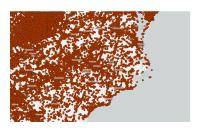

In [7]:
item = gis.content.get( "56eac669cfbf4b529c067a65a3c559b5" )
item

With SEDF, no manual pagination is needed - Python API handles all of that for us behind the scenes

In [8]:
df = item.layers[0 ].query( "1=1" ).sdf

<Item title:"USA Census Counties" type:Feature Layer Collection owner:esri_dm>
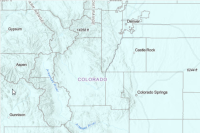

In [9]:
cnty_item = gis.content.get( "14c5450526a8430298b2fa74da12c2f4" )
cnty_item

In [10]:
df_cnty = cnty_item.layers[0].query( "1=1" ).sdf
df_cnty.shape

(3143, 13)

Before we can use spatial join need to have both layers in the same coordinate system. Can use the project() function to convert the Counties layer to NAD83.

In [11]:
df_cnty.spatial.project(4269)

True

For GeoPandas, we need to roll our own pagination of large feature layers

In [12]:
def featureservice_to_gdf(url):
    params = dict(where= "1=1", returnCountOnly="true", f="json")
    response = requests.get(url, params=params)
    total_size = response.json()['count']

    resultOffset = 0
    params = dict(
        f="json",
        outFields='*',
        resultOffset=resultOffset,
        where="1=1")
    calls = total_size // 1000
    out = []
    while params["resultOffset"] < total_size:
        remaining = total_size - params["resultOffset"]
        if remaining < 1000:
            params["resultRecordCount"] = remaining

        # get raw features
        try:
            response = requests.get(url, params=params)
            gdf = gpd.read_file(response.text)
            out.append(gdf)
        except:
            print('failed, trying again')
            response = requests.get(url, params=params)
            gdf = gpd.read_file(response.text)
            out.append(gdf)

        params["resultOffset"] += len(out[-1])
    return pd.concat(out, axis=0).reset_index(drop=True)

In [13]:
url = "https://services.arcgis.com/cJ9YHowT8TU7DUyn/arcgis/rest/services/FRS_INTERESTS_NPDES/FeatureServer/0/query"
gpd_df = featureservice_to_gdf(url)
gpd_df.shape

(1332929, 33)

In [14]:
url = "https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Census_Counties/FeatureServer/0/query"
gpd_dfcnty = featureservice_to_gdf(url)
gpd_dfcnty = gpd_dfcnty.to_crs(4269)
gpd_dfcnty.shape

(3143, 13)

Let's break these datasets into several different sizes for testing performance across different ranges of inputs.

In [15]:
# Filtering to just TX counties (n=254)
df_cntytx = df_cnty[df_cnty['STATE_ABBR']=='TX']
gpd_dfcntytx = gpd_dfcnty[gpd_dfcnty['STATE_ABBR']=='TX']
# Filtering points to just TX as well (n=169382)
dftx = df[df['STATE_CODE']=='TX']
# Further filtering TX points down to 1000 & 10000
dftx1k = dftx.head(1000)
dftx10k = dftx.head(10000)
gpd_dftx = gpd_df[gpd_df['STATE_CODE']=='TX']
gpd_dftx1k = gpd_dftx.head(1000)
gpd_dftx10k = gpd_dftx.head(10000)
gpd_dftx10k.shape

(10000, 33)

In [16]:
join_times = []
# point n=1000; polygon n=254
for i in range(3):
    st = time.time()
    gpd_sdf2 = gpd.sjoin(gpd_dftx1k, gpd_dfcntytx)
    et = time.time()
    join_times.append({
        'size': '1,000x254',
        'tool': 'GeoPandas',
        'time': (et - st)
    })
    st = time.time()
    sdf2 = dftx1k.spatial.join(df_cntytx)
    et = time.time()
    join_times.append({
        'size': '1,000x254',
        'tool': 'SEDF',
        'time': (et - st)
    })

In [17]:

# point n=10000; polygon n=254
for i in range(3):
    st = time.time()
    gpd_sdf2 = gpd.sjoin(gpd_dftx10k, gpd_dfcntytx)
    et = time.time()
    join_times.append({
        'size': '10,000x254',
        'tool': 'GeoPandas',
        'time': (et - st)
    })
    st = time.time()
    sdf2 = dftx10k.spatial.join(df_cntytx)
    et = time.time()
    join_times.append({
        'size': '10,000x254',
        'tool': 'SEDF',
        'time': (et - st)
    })

In [18]:

# point n=169382; polygon n=254
for i in range(3):
    st = time.time()
    gpd_sdf2 = gpd.sjoin(gpd_dftx, gpd_dfcntytx)
    et = time.time()
    join_times.append({
        'size': '169,382x254',
        'tool': 'GeoPandas',
        'time': (et - st)
    })
    print('GPD' + str(et - st))
    st = time.time()
    sdf2 = dftx.spatial.join(df_cntytx)
    et = time.time()
    join_times.append({
        'size': '169,382x254',
        'tool': 'SEDF',
        'time': (et - st)
    })

In [19]:

# point n=1332929; polygon n=3143
for i in range(3):
    st = time.time()
    gpd_sdf2 = gpd.sjoin(gpd_df, gpd_dfcnty)
    et = time.time()
    join_times.append({
        'size': '1,332,929x3143',
        'tool': 'GeoPandas',
        'time': (et - st)
    })
    print('GPD' + str(et - st))
    st = time.time()
    sdf2 = df.spatial.join(df_cnty)
    et = time.time()
    join_times.append({
        'size': ' 1,332,929x3143',
        'tool': 'SEDF',
        'time': (et - st)
    })

Combine results into a dataframe for charting

In [20]:
perf = pd.DataFrame(join_times)
perf

,size,tool,time
0,"1,000x254",GeoPandas,0.627789
1,"1,000x254",SEDF,2.613761
2,"1,000x254",GeoPandas,0.059017
3,"1,000x254",SEDF,2.253547
4,"1,000x254",GeoPandas,0.084056
5,"1,000x254",SEDF,2.316195
6,"10,000x254",GeoPandas,0.650316
7,"10,000x254",SEDF,21.270459
8,"10,000x254",GeoPandas,0.629212
9,"10,000x254",SEDF,21.619309


Aggregate data by Size/Tool and average the runs across each. Plot on a bar chart with log-scale y-axis.

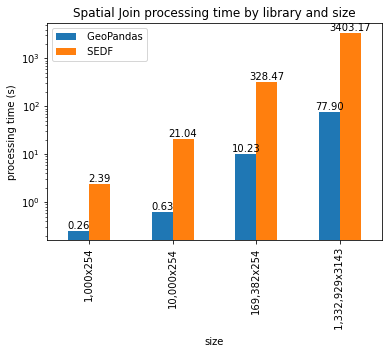

In [21]:
fig, ax = plt.subplots()
perf.groupby(['size', 'tool'])['time'].agg(['mean']).unstack(level=1).plot(kind='bar', ax=ax, logy=True, title='Spatial Join processing time by library and size')
handles, labels = ax.get_legend_handles_labels()
labels_new = [label.strip('()').split(',')[1] for label in labels]
ax.set_ylabel("processing time (s)")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.legend(handles, labels_new)
plt.show()